# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.


Vou estudar os dados coletados e determinar quais fatores influenciaram o preço de um veículo.


## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt




### Carregue dados

Carreguei os dados do projeto para olhar melhor as informações

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df= pd.read_csv('/datasets/vehicles_us.csv')
df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada



In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprima uma amostragem dos dados
df.head(15)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17




Por enquanto alguns tipos de dados precisam ser mudados de float para int por exemplo e muitos dados ausentes.

In [5]:
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000




Das colunas numéricas so price e days_listed estão sem valores ausentes



Colunas com valores ausentes: model_year, cylinders, odometer, is_4wd(a que mais tem) e paint_color.
Colunas que precisam mudar o tipo do dado: model_year, is_4wd, e talvez cylinders.  

### Conclusões e próximos passos


Deixei a baixo uma lista de colunas que tem erros e como irei conserta-los
model_year: podemos pegar a mediana
cylinders: mediana
odometer: mediana
is_4wd: substituir para false
paint_color: unknown 



In [6]:
display(df.isna().sum())
display(df['paint_color'].describe())
display(df['is_4wd'].describe())
display(df['odometer'].describe())
display(df['cylinders'].describe())
display(df['model_year'].describe())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

## Cuide dos valores ausentes (se houver algum)



Fiz uma tabela pivot para substituir os valores ausentes da melhor forma. Juntando por modelo e condição do carro. 

In [7]:
dfmy= df.pivot_table(index='model', columns='condition' ,values='model_year', aggfunc='median')
dfmy

condition,excellent,fair,good,like new,new,salvage
model,,,,,,
acura tl,2009.0,2004.0,2007.0,2007.0,NaN,NaN
bmw x5,2010.0,2004.0,2006.0,2009.0,NaN,NaN
buick enclave,2012.0,2011.0,2011.0,2015.0,NaN,NaN
cadillac escalade,2009.0,2004.0,2007.0,2012.0,NaN,NaN
chevrolet camaro,2013.0,1995.0,2010.0,2015.0,2016.0,NaN
...,...,...,...,...,...,...
toyota sienna,2010.0,2005.0,2006.0,2014.0,2019.0,NaN
toyota tacoma,2012.0,2004.0,2007.0,2016.0,2013.0,2011.0
toyota tundra,2012.0,2004.0,2006.0,2014.0,NaN,2017.0


In [8]:
def aux_fill_NaN(condition,model):
    try:
        return dfmy[condition][model]   
    except:
        return 'erro'

In [9]:
aux_fill_NaN('fair','bmw x5')

2004.0

In [10]:
df['mediana_model_year'] = df.apply(lambda row: aux_fill_NaN(row['condition'],row['model']), axis=1)
df['model_year']=df['model_year'].fillna(df['mediana_model_year'])

In [11]:
df[df['model_year']=='erro']


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year


In [12]:
dfc= df.pivot_table(index='model', columns='condition' ,values='cylinders', aggfunc='median')
dfc

condition,excellent,fair,good,like new,new,salvage
model,,,,,,
acura tl,6.0,6.0,6.0,6.0,NaN,NaN
bmw x5,6.0,7.0,6.0,6.0,NaN,NaN
buick enclave,6.0,6.0,6.0,6.0,NaN,NaN
cadillac escalade,8.0,8.0,8.0,8.0,NaN,8.0
chevrolet camaro,6.0,6.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...
toyota sienna,6.0,6.0,6.0,6.0,6.0,NaN
toyota tacoma,6.0,4.0,6.0,6.0,6.0,5.0
toyota tundra,8.0,8.0,8.0,8.0,NaN,8.0


In [13]:
def aux_fill_NaN(condition,model):
    try:
        return dfc[condition][model]   
    except:
        return 'erro'

In [14]:
aux_fill_NaN('fair','bmw x5')

7.0

In [15]:
df['mediana_cylinders'] = df.apply(lambda row: aux_fill_NaN(row['condition'],row['model']), axis=1)
df['cylinders']=df['cylinders'].fillna(df['mediana_cylinders'])

In [16]:
df[df['cylinders']=='erro']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders


In [17]:
dfo= df.pivot_table(index='model', columns='condition',values='odometer', aggfunc='median')
dfo

condition,excellent,fair,good,like new,new,salvage
model,,,,,,
acura tl,122072.0,212000.0,163500.0,137000.0,NaN,NaN
bmw x5,101042.0,124792.0,136101.0,103000.0,NaN,NaN
buick enclave,114856.0,189769.0,123000.0,84769.0,NaN,NaN
cadillac escalade,123000.0,220000.0,148000.0,74923.0,NaN,108000.0
chevrolet camaro,54277.5,137230.0,105894.0,24000.0,128.0,NaN
...,...,...,...,...,...,...
toyota sienna,124394.0,210324.5,164000.0,101266.0,5000.0,NaN
toyota tacoma,111048.0,187537.5,161000.0,58948.0,121500.0,64046.0
toyota tundra,95604.0,247770.0,151691.5,71000.0,NaN,29328.0


In [18]:
def aux_fill_NaN(condition,model):
    try:
        return dfo[condition][model]   
    except:
        return 'erro'

In [19]:
aux_fill_NaN('fair','bmw x5')

124792.0

In [20]:
df['mediana_odometer'] = df.apply(lambda row: aux_fill_NaN(row['condition'],row['model']), axis=1)
df['odometer']=df['odometer'].fillna(df['mediana_odometer'])

In [21]:
df[df['odometer']=='erro'] #erro no mercedes-benz benze sprinter 2500
df[df['model']=='mercedes-benz benze sprinter 2500'] #erro no mercedes-benz benze sprinter 2500

dfodo= df[(df['type']=='van')&(df['odometer']!='erro')]
df['odometer'] = df['odometer'].replace('erro', dfodo['odometer'].median())#substitui pela mediana do odometer das vans
df['odometer'].value_counts()

107000.0    311
144000.0    233
130000.0    224
160000.0    220
140000.0    204
           ... 
230295.0      1
251285.0      1
2636.0        1
91821.0       1
269527.0      1
Name: odometer, Length: 17874, dtype: int64

In [22]:
df['is_4wd'].value_counts()#todos os valores não ausentes são 1 então todos os ausentes sao 0
df['is_4wd']=df['is_4wd'].fillna(0.0)

In [23]:
df['paint_color'] = df['paint_color'].fillna('unknown')#acredito que a cor influencia na venda então essa seria a melhor opção

In [24]:
df.isna().sum()#algumas colunas ainda tem valores ausentes numa quantidade bem manor e insignificante então vou substituir pela mediana

price                 0
model_year            6
model                 0
condition             0
cylinders             5
fuel                  0
odometer              9
transmission          0
type                  0
paint_color           0
is_4wd                0
date_posted           0
days_listed           0
mediana_model_year    6
mediana_cylinders     5
mediana_odometer      9
dtype: int64

In [25]:
df['model_year'] = df['model_year'].fillna(df['model_year'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [26]:
df.isna().sum()#as colunas importantes estão corretas, irei substituir as outras pela mediana da coluna

price                 0
model_year            0
model                 0
condition             0
cylinders             0
fuel                  0
odometer              0
transmission          0
type                  0
paint_color           0
is_4wd                0
date_posted           0
days_listed           0
mediana_model_year    6
mediana_cylinders     5
mediana_odometer      9
dtype: int64

## Corrija os tipos de dados


model_year:float para int
condition: obj para escala numerica
is_4wd: float para int
cylinders: float para int

In [27]:
df['price'] = df['price'].astype(float)
df['cylinders'] = df['cylinders'].astype(int)
df['model_year'] = df['model_year'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(int)
df['condition'] = df['condition'].replace('good', 2)
df['condition'] = df['condition'].replace('like new', 4)
df['condition'] = df['condition'].replace('fair', 1)
df['condition'] = df['condition'].replace('excellent', 3)
df['condition'] = df['condition'].replace('salvage', 0)
df['condition'] = df['condition'].replace('new', 5)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               51525 non-null  float64
 1   model_year          51525 non-null  int64  
 2   model               51525 non-null  object 
 3   condition           51525 non-null  int64  
 4   cylinders           51525 non-null  int64  
 5   fuel                51525 non-null  object 
 6   odometer            51525 non-null  float64
 7   transmission        51525 non-null  object 
 8   type                51525 non-null  object 
 9   paint_color         51525 non-null  object 
 10  is_4wd              51525 non-null  int64  
 11  date_posted         51525 non-null  object 
 12  days_listed         51525 non-null  int64  
 13  mediana_model_year  51519 non-null  float64
 14  mediana_cylinders   51520 non-null  float64
 15  mediana_odometer    51516 non-null  object 
dtypes: f

## Enriqueça os dados



Dia da semana, mês, e ano que a propaganda foi colocada

A idade do veículo (em anos) quando a propaganda foi colocada

A média de quilometragem por ano

In [28]:
# Adicione valores data/hora para quando a propaganda estiver colocada

df['date_posted'] = pd.to_datetime(df['date_posted'])

df['week_day'] = df['date_posted'].dt.weekday
# Adicione a idade do veículo quando a propaganda for colocada
df['age'] = df['date_posted'].dt.year - df['model_year'] +1
# Adicione a quilometragem média por ano
df['mean_km'] = df['odometer']/df['age']
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2016.0,6.0,55919.0,2,6,14689.333333
51521,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2007.0,4.0,181500.0,2,17,10676.470588
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2012.0,4.0,94000.0,3,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2009.0,4.0,125780.5,0,6,23262.166667


## Verifique os dados limpos

In [29]:
# imprima as informações gerais/resumidas sobre o DataFrame
df['mediana_model_year']= df['mediana_model_year'].fillna(df['model_year'].median())
df['mediana_odometer']= df['mediana_odometer'].fillna(df['odometer'].median())
df['mediana_cylinders']= df['mediana_cylinders'].fillna(df['cylinders'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  float64       
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  int64         
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  mediana_model_year  51525 non-null  float64   

In [30]:
# imprima uma amostragem dos dados

df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
5,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2012.0,6.0,101718.0,2,5,11590.800000
6,12990.0,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,2010.0,4.0,109532.0,3,4,19803.000000
7,15990.0,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,2010.0,6.0,131565.0,0,7,15639.000000
8,11500.0,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,2014.0,4.0,90588.0,0,7,14882.000000
9,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2010.0,6.0,131565.0,4,12,12265.916667


## Estude os parâmetros fundamentais



Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

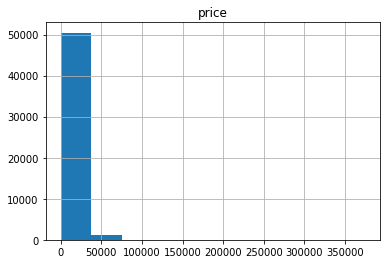

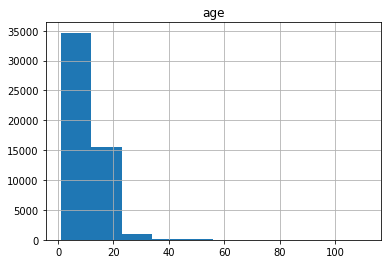

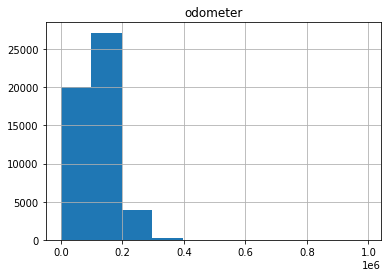

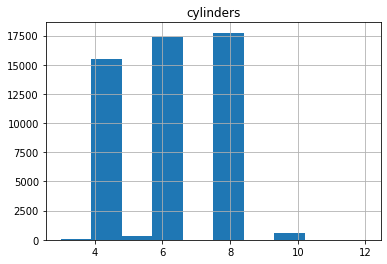

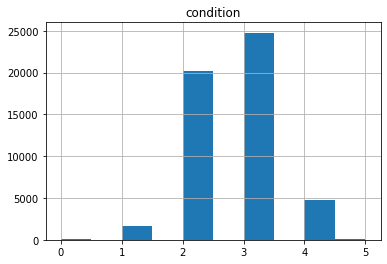

In [31]:
#

import matplotlib.pyplot as plt
cols = ['price', 'age', 'odometer', 'cylinders', 'condition']
for col in cols:
    df.hist(column=[col]);
    plt.show()


## Estude e cuide dos valores atípicos 

Criando data frame sem valores atípicos 

In [32]:
# Determine o limite inferior para valores atípicos
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1

lim_inf= q1-(1.5*iqr)
# Determine o limite superior para valores atípicos
lim_sup= q3+(1.5*iqr)
# Armazene os dados sem os valores atípicos em um DataFrame separado
df_price=df.loc[(df['price']>lim_inf)&(df['price']<lim_sup),:]
df_price



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2016.0,6.0,55919.0,2,6,14689.333333
51521,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2007.0,4.0,181500.0,2,17,10676.470588
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2012.0,4.0,94000.0,3,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2009.0,4.0,125780.5,0,6,23262.166667


In [33]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1

lim_inf= q1-(1.5*iqr)
lim_sup= q3+(1.5*iqr)
df_age=df.loc[(df['age']>lim_inf)&(df['age']<lim_sup),:]
df_age

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2016.0,6.0,55919.0,2,6,14689.333333
51521,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2007.0,4.0,181500.0,2,17,10676.470588
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2012.0,4.0,94000.0,3,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2009.0,4.0,125780.5,0,6,23262.166667


In [34]:
q1=df['odometer'].quantile(0.25)
q3=df['odometer'].quantile(0.75)
iqr=q3-q1

lim_inf= q1-(1.5*iqr)
lim_sup= q3+(1.5*iqr)
df_odometer=df.loc[(df['odometer']>lim_inf)&(df['odometer']<lim_sup),:]
df_odometer

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2016.0,6.0,55919.0,2,6,14689.333333
51521,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2007.0,4.0,181500.0,2,17,10676.470588
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2012.0,4.0,94000.0,3,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2009.0,4.0,125780.5,0,6,23262.166667


In [35]:
q1=df['cylinders'].quantile(0.25)
q3=df['cylinders'].quantile(0.75)
iqr=q3-q1

lim_inf= q1-(1.5*iqr)
lim_sup= q3+(1.5*iqr)
df_cylinders=df.loc[(df['cylinders']>lim_inf)&(df['cylinders']<lim_sup),:]
df_cylinders

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2016.0,6.0,55919.0,2,6,14689.333333
51521,2700.0,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2007.0,4.0,181500.0,2,17,10676.470588
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2012.0,4.0,94000.0,3,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2009.0,4.0,125780.5,0,6,23262.166667


In [36]:
q1=df['condition'].quantile(0.25)
q3=df['condition'].quantile(0.75)
iqr=q3-q1

lim_inf= q1-(1.5*iqr)
lim_sup= q3+(1.5*iqr)
df_condition=df.loc[(df['condition']>lim_inf)&(df['condition']<lim_sup),:]
df_condition

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2006.0,6.0,136101.0,5,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2008.0,8.0,144000.0,4,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2014.0,4.0,80951.5,1,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,113181.0,automatic,coupe,unknown,0,2018-11-24,89,2010.0,4.0,113181.0,5,4,28295.250000
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2016.0,6.0,55919.0,2,6,14689.333333
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2012.0,4.0,94000.0,3,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2009.0,4.0,125780.5,0,6,23262.166667


## Estude os parâmetros fundamentais sem valores atípicos

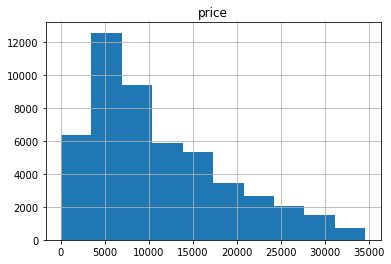

In [37]:
df_price.hist(column=['price']);
#mudou de forma significativa, onde podemos entender melhor como o gráfico se comporta, com um pico na parte inicial

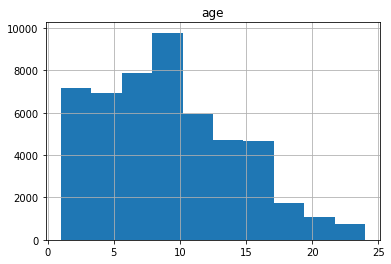

In [38]:
df_age.hist(column=['age']);
#mudou de forma significativa, onde podemos entender melhor como o gráfico se comporta, com um pico entre a parte inicial e central

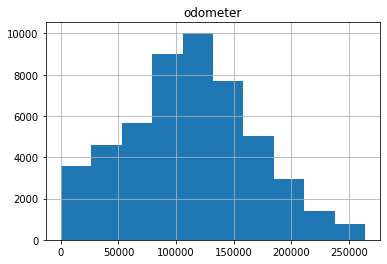

In [39]:
df_odometer.hist(column=['odometer']);
#mudou de forma significativa, onde podemos entender melhor como o gráfico se comporta, com um pico na parte central

#REVISAR

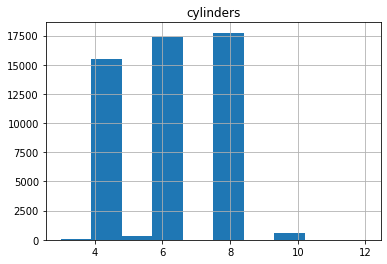

In [40]:
df_cylinders.hist(column=['cylinders']);
#se manteve igual

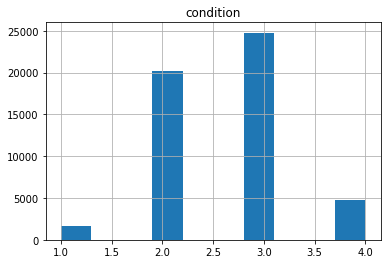

In [41]:
df_condition.hist(column=['condition']);
#mudou mas não de uma forma significativa, tendo poucos outliers

## Tempo de vida das propagandas

Calculei a média e a mediana. Descrevi o tempo de vida útil comum de uma propaganda. Determinei quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.

In [42]:
media_dias_propagandas = df['days_listed'].mean()
display(media_dias_propagandas)
mediana_dias_propagandas = df['days_listed'].median()
display(mediana_dias_propagandas)

39.55475982532751

33.0

In [43]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [44]:
rapidas=df.loc[df['days_listed']<19]
longas=df[df['days_listed']>53]

display(rapidas)
display(longas)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
3,1500.0,2003,ford f-150,1,8,gas,191850.0,automatic,pickup,unknown,0,2019-03-22,9,2001.0,8.0,191850.0,4,17,11285.294118
5,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2012.0,6.0,101718.0,2,5,11590.800000
9,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2010.0,6.0,131565.0,4,12,12265.916667
16,14990.0,2010,ram 1500,3,8,gas,130725.0,automatic,pickup,red,1,2018-12-30,13,2013.0,8.0,103800.0,6,9,14525.000000
18,12500.0,2013,chevrolet traverse,3,6,gas,128325.0,automatic,SUV,white,1,2019-04-09,13,2012.0,6.0,119940.0,1,7,18332.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51504,20481.0,2018,toyota camry,4,4,gas,38590.0,automatic,sedan,silver,0,2018-12-06,4,2012.0,4.0,90000.0,3,1,38590.000000
51505,2000.0,2000,ford f150,2,6,gas,122000.0,automatic,truck,white,0,2019-01-22,15,2006.0,8.0,164000.0,1,20,6100.000000
51509,5980.0,2010,subaru impreza,3,4,gas,121778.0,manual,hatchback,white,1,2019-01-10,8,2011.0,4.0,104831.0,3,10,12177.800000
51513,17999.0,2014,ram 1500,4,8,gas,154000.0,automatic,pickup,white,1,2018-06-21,11,2015.0,8.0,63000.0,3,5,30800.000000


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mediana_model_year,mediana_cylinders,mediana_odometer,week_day,age,mean_km
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2014.0,4.0,69500.0,3,7,15714.285714
6,12990.0,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,2010.0,4.0,109532.0,3,4,19803.000000
7,15990.0,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,2010.0,6.0,131565.0,0,7,15639.000000
15,17990.0,2013,ram 1500,3,8,gas,103800.0,automatic,pickup,red,1,2018-05-15,111,2013.0,8.0,103800.0,1,6,17300.000000
22,7500.0,2004,chevrolet silverado,4,8,gas,180000.0,automatic,truck,red,1,2019-01-05,64,2015.0,8.0,53000.0,5,16,11250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51503,6595.0,2011,chevrolet malibu,3,4,gas,100780.0,automatic,sedan,unknown,0,2019-02-27,73,2013.0,4.0,95594.0,2,9,11197.777778
51512,7300.0,2013,nissan altima,3,6,gas,7100.0,automatic,sedan,black,0,2018-06-17,63,2013.0,4.0,95866.0,6,6,1183.333333
51518,3750.0,2005,ford taurus,3,6,gas,110200.0,automatic,sedan,silver,0,2018-08-10,63,2010.0,6.0,130000.0,4,14,7871.428571
51519,11750.0,2015,honda accord,3,4,gas,113181.0,automatic,coupe,unknown,0,2018-11-24,89,2010.0,4.0,113181.0,5,4,28295.250000


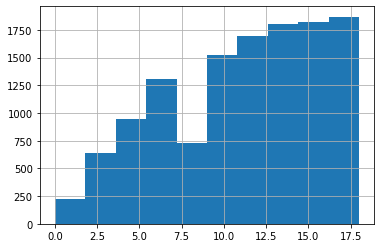

In [45]:
rapidas['days_listed'].hist();

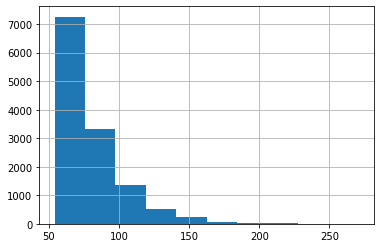

In [46]:
longas['days_listed'].hist();

## Média de preços por cada tipo de veículo

Analisei o número de propagandas e o preço médio para cada tipo de veículo. Construi um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecionei os dois tipos com os maiores números de propagandas.

In [47]:
df_aux= df.groupby('type').agg({'model': 'count', 'price': 'mean'}).reset_index().rename(columns={'model':'count', 'price':'avg price'}).sort_values(by=['count'], ascending=False)
df_aux

,type,count,avg price
0,SUV,12405,11149.400000
10,truck,12353,16734.894924
9,sedan,12154,6965.358647
8,pickup,6988,16057.410418
3,coupe,2303,14353.442901
12,wagon,1541,9088.134328
5,mini-van,1161,8193.177433
4,hatchback,1047,6868.513849
11,van,633,10546.941548
2,convertible,446,14575.881166


<AxesSubplot:ylabel='type'>

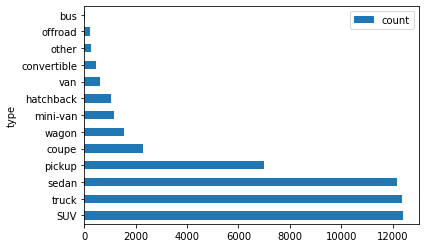

In [48]:
df_aux.plot.barh(y='count', x='type')

## Fatores de preço

Irei estudar se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor.

[Faça uso da matriz de correlação e gráficos de correlação]

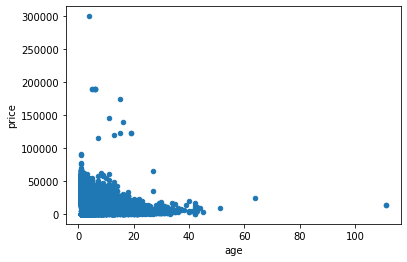

In [49]:
df[df['type'].isin(['SUV', 'truck'])].plot.scatter(x='age',y='price');



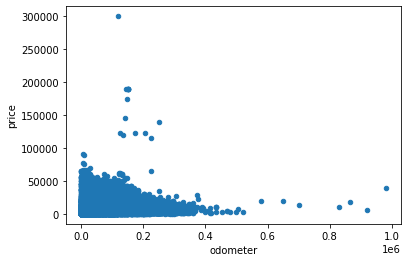

In [50]:
df[df['type'].isin(['SUV', 'truck'])].plot.scatter(x='odometer',y='price');

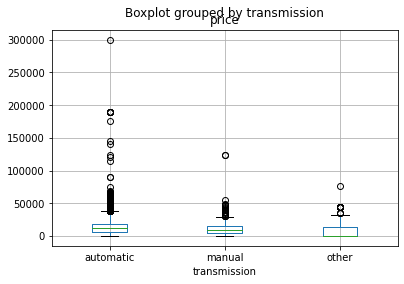

In [51]:
df[df['type'].isin(['SUV', 'truck'])].boxplot('price', by='transmission');

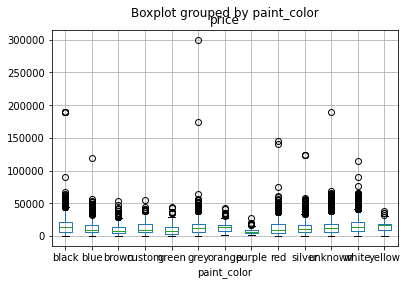

In [52]:
df[df['type'].isin(['SUV', 'truck'])].boxplot('price', by='paint_color');

## Conclusão geral



Vemos uma relação clara de quanto mais novo o carro maior o preço, assim como com menos km rodado também é mais caro. Os carros automáticos são claramente mais caros também. As cores que são mais caras são preto, cinza, vermelho e branco. Sendo branco a mais frequente(analisado anteriormente com .describe()). Então o carro mais caro seria um carro branco com pouca kilometragem, novo e automático. 